In [1]:
# 我们将继续使用Fashion-MNIST图像分类数据集
import torch
from torch import nn
from d2l import torch as d2l


batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [6]:
# 初始化模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [2]:
# 激活函数
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [3]:
# 模型
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [4]:
# 损失函数
loss = nn.CrossEntropyLoss()

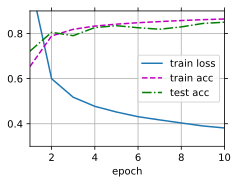

In [7]:
# 训练
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

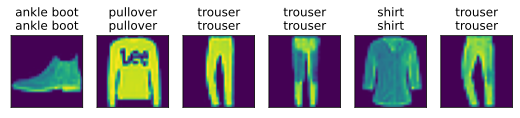

In [8]:
# 为了对学习到的模型进行评估，我们将在一些测试数据上应用这个模型。
d2l.predict_ch3(net, test_iter)